# Missing Data and PCA

### 1a.	Explore the dataset and show the details of the dataset(using pandas)

In [88]:
import pandas as pd
import numpy as np

In [30]:
loan=pd.read_csv('/Users/yoga/Dropbox/0 FSU/5_2023_spring/3 CAP intro to data science/assignment/Introduction to Data Science assignment1/loan.csv')

In [31]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
loan.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
loan.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
loan.shape

(614, 13)

### 1.b	Discuss different types of missing values with examples

In [8]:
#find rows with at least one nan value

rows_with_nan = loan[loan.isna().any(axis=1)]

In [9]:
rows_with_nan.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 134 entries, 0 to 605
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            134 non-null    object 
 1   Gender             121 non-null    object 
 2   Married            131 non-null    object 
 3   Dependents         119 non-null    object 
 4   Education          134 non-null    object 
 5   Self_Employed      102 non-null    object 
 6   ApplicantIncome    134 non-null    int64  
 7   CoapplicantIncome  134 non-null    float64
 8   LoanAmount         112 non-null    float64
 9   Loan_Amount_Term   120 non-null    float64
 10  Credit_History     84 non-null     float64
 11  Property_Area      134 non-null    object 
 12  Loan_Status        134 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 14.7+ KB


In [10]:
#missing gender
gender=rows_with_nan[rows_with_nan['Gender'].isnull()]

In [11]:
gender[:5]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
126,LP001448,NaN,Yes,3+,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,Y
171,LP001585,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
188,LP001644,NaN,Yes,0,Graduate,Yes,674,5296.0,168.0,360.0,1.0,Rural,Y
314,LP002024,NaN,Yes,0,Graduate,No,2473,1843.0,159.0,360.0,1.0,Rural,N


In [12]:
# missing loan amount

loanamount=rows_with_nan[rows_with_nan['LoanAmount'].isnull()]

In [13]:
loanamount[:5]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
35,LP001106,Male,Yes,0,Graduate,No,2275,2067.0,NaN,360.0,1.0,Urban,Y
63,LP001213,Male,Yes,1,Graduate,No,4945,0.0,NaN,360.0,0.0,Rural,N
81,LP001266,Male,Yes,1,Graduate,Yes,2395,0.0,NaN,360.0,1.0,Semiurban,Y
95,LP001326,Male,No,0,Graduate,NaN,6782,0.0,NaN,360.0,NaN,Urban,N


### 1c.	How do you find missing values from a dataset ? Show the total number of missing values in the entire loan dataset

In total, there are 134 rows of missing value in the dataset

In [14]:
#find rows with at least one nan value

rows_with_nan = loan[loan.isna().any(axis=1)]

In [15]:
rows_with_nan.shape

(134, 13)

### 1d.	How do you handle missing data? Just mention the approach.

To handle the missing value, I have the following approaches:
1. impute the mean or median value or the most common class for all missing values in a variable,
2. create a new variable in to indicate whether the value is missing, nad plug in zero or mean in the actual variable.
3. for each missing entry, randomly select an observed entry in the variable and plug in.
4. plug in predicted values from a model based on other observed predictors.
5. plug in predicted values plus randomness from a model based on the other observed predictors.

### 1e.	Now apply different imputation techniques in the loan dataset and show the results.(you can use sci-kit learn or pandas library)

#### impute the missing data with zero

In [40]:
loan1=loan.copy()
loan1.fillna(0, inplace=True)

In [52]:
loan1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


#### impute misising data with KNN imputer for floating data and impute catogary data with the most frequent value for each column 


In [78]:
from sklearn.impute import KNNImputer

loan2=loan.copy()
# Create an instance of the KNNImputer
imputer = KNNImputer(n_neighbors=5)

# Select only the columns with float or int data type
numeric_loan2 = loan2.select_dtypes(include=['float', 'int'])
# Fit the imputer on the data and transform to impute missing values
df_imputed = imputer.fit_transform(numeric_loan2)

# Convert the result back to a DataFrame
loan2 = pd.DataFrame(df_imputed, columns=numeric_loan2.columns)



In [79]:
# Select only the columns without float or int data type
non_numeric_loan2 = loan.drop(columns=numeric_loan2.columns)
# Impute missing values with the mode of each column
non_numeric_loan2.fillna(non_numeric_loan2.mode().iloc[0], inplace=True)

# Combine DataFrames horizontally (side-by-side)
df_combined = pd.concat([non_numeric_loan2, loan2], axis=1)

In [80]:
df_combined.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   Property_Area      614 non-null    object 
 7   Loan_Status        614 non-null    object 
 8   ApplicantIncome    614 non-null    float64
 9   CoapplicantIncome  614 non-null    float64
 10  LoanAmount         614 non-null    float64
 11  Loan_Amount_Term   614 non-null    float64
 12  Credit_History     614 non-null    float64
dtypes: float64(5), object(8)
memory usage: 62.5+ KB


## 2 When does a model become unidentifiable ? How do you handle such a model ?

when the model is unidentifiable, it is mainly because that the parameters or variables are more than the observations. so I don't have enough information to esitmate the parameter.

to tackle this problem, I need to
1) increase the number of observations

2) consider only important parameters,

3) perform dimension reduction techniques, such as using PCA to reduce the number of parameters and select important parameters.

## 3. Consider the following dataset having 2 variables x1 and x2. Calculate the principal components of the dataset using numerical approach. 


In [195]:
#first calculate the mean of x1 and x2
x1=[2.8,0.8,1.5,3,2.2,1.1,2]
x2=[2.7,0.7,1.3,3.3,1.9,0.8,1.7]

In [196]:
np.mean(x1)

1.9142857142857144

In [197]:
np.mean(x2)

1.7714285714285716

In [198]:
#second, subtract the mean 
x1_minus_mean_list=[]
x2_minus_mean_list=[]
for i in x1:
    i_minus_mean=i-np.mean(x1)
    x1_minus_mean_list.append(i_minus_mean)

for j in x2:
    j_minus_mean=j-np.mean(x2)
    x2_minus_mean_list.append(j_minus_mean)



In [199]:
x1_minus_mean_list

[0.8857142857142855,
 -1.1142857142857143,
 -0.41428571428571437,
 1.0857142857142856,
 0.2857142857142858,
 -0.8142857142857143,
 0.08571428571428563]

In [200]:
x2_minus_mean_list

[0.9285714285714286,
 -1.0714285714285716,
 -0.47142857142857153,
 1.5285714285714282,
 0.12857142857142834,
 -0.9714285714285715,
 -0.07142857142857162]

In [201]:
#third, calcuate the covariance matrix for the x1 and x2

data=np.array([x1_minus_mean_list,x2_minus_mean_list])
data

array([[ 0.88571429, -1.11428571, -0.41428571,  1.08571429,  0.28571429,
        -0.81428571,  0.08571429],
       [ 0.92857143, -1.07142857, -0.47142857,  1.52857143,  0.12857143,
        -0.97142857, -0.07142857]])

In [202]:
covariance_matrix = np.cov(data)

In [203]:
covariance_matrix

array([[0.68809524, 0.78214286],
       [0.78214286, 0.92238095]])

In [97]:
# Find the eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

# The eigenvectors are stored in the columns of the eigenvectors array
print("Eigenvectors:",eigenvectors)


# The eigenvalues are stored in the eigenvalues array
print("Eigenvalues:",eigenvalues)

Eigenvectors: [[-0.75766735 -0.65264093]
 [ 0.65264093 -0.75766735]]
Eigenvalues: [0.01437155 1.59610464]


In [102]:
# we can see the second Eigenvalues is larger, so the first principal component is the second Eigenvalues: 1.596
#the seconed principal component is the first Eigenvalues: 0.014
eigenvectors


array([[-0.75766735, -0.65264093],
       [ 0.65264093, -0.75766735]])

In [189]:
#reversed_eigenvectors = np.array(eigenvectors)[::-1]

reversed_eigenvectors = eigenvectors[:, np.flip(np.argsort(eigenvalues))]

In [190]:
reversed_eigenvectors

array([[-0.65264093, -0.75766735],
       [-0.75766735,  0.65264093]])

In [188]:
pca.components_.T

array([[ 0.65264093, -0.75766735],
       [ 0.75766735,  0.65264093]])

In [181]:
eigenvalues

array([0.01437155, 1.59610464])

In [183]:
pca.explained_variance_

array([1.59610464, 0.01437155])

In [191]:
#apply matrix multiplication

data_transpose=data.transpose()


In [192]:
z=np.dot(data_transpose,reversed_eigenvectors)
z

array([[-1.28160165e+00, -6.50530721e-02],
       [ 1.53901491e+00,  1.44999762e-01],
       [ 6.27565851e-01,  6.21717656e-03],
       [-1.86673025e+00,  1.74998018e-01],
       [-2.83883211e-01, -1.32565409e-01],
       [ 1.26745590e+00, -1.70363500e-02],
       [-1.82155498e-03, -1.11560125e-01]])

In [193]:
#use the package to double check the results
import numpy as np
from sklearn.decomposition import PCA
X=np.array([x1,x2]).transpose()
pca=PCA().fit(X)
pcax=pca.transform(X)

pcax_df=pd.DataFrame(pcax,columns=['1','2'])

In [194]:
pcax

array([[ 1.28160165e+00, -6.50530721e-02],
       [-1.53901491e+00,  1.44999762e-01],
       [-6.27565851e-01,  6.21717656e-03],
       [ 1.86673025e+00,  1.74998018e-01],
       [ 2.83883211e-01, -1.32565409e-01],
       [-1.26745590e+00, -1.70363500e-02],
       [ 1.82155498e-03, -1.11560125e-01]])

## 4.  Find a dataset of 1 million records with 10 features to do PCA

### dataset link

https://www.kaggle.com/datasets/wenruliu/adult-income-dataset

### Python code with the above-described functionality

The task is to identify the top 10 features that have the highest correlation with the target variable. Implement a solution using a combination of Python pandas and the sci-kit-learn library. The solution should be able to handle the large scale of the data and use dimensionality reduction techniques such as PCA or Lasso to reduce the number of features and select the most relevant features.

In [14]:
adult=pd.read_csv('/Users/yoga/Dropbox/0 FSU/5_2023_spring/3 CAP intro to data science/assignment/Introduction to Data Science assignment1/adult.csv')

In [27]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [16]:
adult_columns=adult.columns.tolist()

In [23]:
adult_columns

['age',
 'workclass',
 'fnlwgt',
 'education',
 'educational-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'income']

In [28]:
catogarical_columns=['workclass','education','marital-status','occupation',
                    'relationship','race','gender','native-country','income']

In [30]:
#lable encoder for catogarical variables

encoded_adult=adult.copy()

for col in catogarical_columns:
    data = adult[col]
    
    # create LabelEncoder object
    le = LabelEncoder()
    
    # fit and transform the data
    encoded_data = le.fit_transform(data)
    
    encoded_adult[col]=encoded_data
    

In [35]:
encoded_adult[:3]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,4,226802,1,7,4,7,3,2,1,0,0,40,39,0
1,38,4,89814,11,9,2,5,0,4,1,0,0,50,39,0
2,28,2,336951,7,12,2,11,0,4,1,0,0,40,39,1


In [42]:
# feature=encoded_adult[encoded_adult.columns.tolist()[:-1]]


In [47]:
column_name=encoded_adult.columns.tolist()
column_name.remove('income')

feature=encoded_adult[column_name]

In [55]:
feature[:1]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,25,4,226802,1,7,4,7,3,2,1,0,0,40,39


In [66]:
encoded_adult[:1]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,4,226802,1,7,4,7,3,2,1,0,0,40,39,0


In [67]:
x1=encoded_adult.iloc[:,1]

In [69]:
x1

0        4
1        4
2        2
3        4
4        0
        ..
48837    4
48838    4
48839    4
48840    4
48841    5
Name: workclass, Length: 48842, dtype: int64

In [76]:
np.corrcoef(x1.T, y)[0,1]

0.01220995617575291

In [77]:
len(encoded_adult.columns)

15

In [79]:
encoded_adult.columns[0]

'age'

In [81]:
name2correlation={}

for number in range(len(encoded_adult.columns)-1):
    name=encoded_adult.columns[number]
    x1=encoded_adult.iloc[:,number]
    y=encoded_adult.iloc[:,-1]
    correlation = np.corrcoef(x1.T, y)[0,1]
    name2correlation[name]=correlation
    
#sort dictionary by value from large to small

sorted_name2correlation = dict(sorted(name2correlation.items(), key=lambda item: item[1], reverse=True))

    
    
    
    

In [85]:
sorted_name2correlation

#from the correlation in the dictionary, we can see that
# the top ten variable that has the largest correlation with the dependent variable (i.e., income)



{'educational-num': 0.3326131306661438,
 'age': 0.23036946784752088,
 'hours-per-week': 0.2276867605608114,
 'capital-gain': 0.22301302085823896,
 'gender': 0.21462803456392812,
 'capital-loss': 0.14755448819939293,
 'education': 0.08009052561043628,
 'occupation': 0.07672172313123109,
 'race': 0.07093428896932867,
 'workclass': 0.05267409354974377,
 'native-country': 0.01220995617575291,
 'fnlwgt': -0.006338859530113214,
 'marital-status': -0.19907178401671688,
 'relationship': -0.2532136290655046}

In [86]:
#next using pca to run feature reduction

import numpy as np
from sklearn.decomposition import PCA

# initialize the PCA model
pca = PCA(n_components=10)

# fit the PCA model to the data
pca.fit(feature)

# transform the data into the first 10 principal components
transformed_data = pca.transform(feature)





In [87]:
# transformed_data
#this is the top ten features using PCA 

pd.DataFrame(transformed_data)

,0,1,2,3,4,5,6,7,8,9
0,37138.149346,-1069.158217,-88.737988,-12.548281,3.285130,-1.830966,0.609996,9.867208,-0.182240,1.385362
1,-99849.846052,-1105.158670,-91.037620,1.537647,9.669215,-1.892990,-1.910301,0.135435,1.191920,-1.413784
2,147287.145479,-1040.207436,-86.839382,-8.374537,2.751613,-2.606959,4.569353,2.325188,-2.801345,-1.179723
3,-29342.869359,6601.360883,-76.720709,3.806154,-2.248693,-2.347294,0.221526,-4.200422,1.823993,-1.227497
4,-86166.846299,-1101.568043,-90.879471,-23.308661,-4.075966,-2.111870,-6.900897,-4.265515,0.760812,1.425984
...,...,...,...,...,...,...,...,...,...,...
48837,67638.148259,-1061.141652,-88.210224,-10.855486,1.202734,-2.281553,6.658190,2.304668,-2.355336,2.589210
48838,-35289.848299,-1088.191718,-89.944731,1.292882,-0.490470,-2.146703,0.432130,-0.276914,1.158585,-1.614742
48839,-37753.848390,-1088.836941,-89.953364,18.235610,-5.888952,-2.282315,-5.521320,-0.186465,1.022353,4.117873
48840,11826.150276,-1075.813852,-89.210991,-21.283764,-14.914138,-2.317103,-5.015710,-0.631298,0.295746,0.104755


### Short Essay about the Solution approach and learning outcomes.



from the correlation results, we can see that educational number has the largest correlation with future income, and the correlation is postive, indicating that more education is associated with more income. meanwhile, the age is also positively associated with the income.

based on the result of PCA, I get the top ten transformed variables to exaplain the dependent variable. However, the PCA is mainly used for dimension reduction but it can not tell which variable is the most relevant because all the new variables is a linear combination of the original variables.

# Introduction, Data , Pandas 

## 5. What is the typical Data Science process? Draw a figure and give an explanation

1. we should have a research question

2. we search and find the data, we should know how were the data sampled, which data are relevant, whether there are private issues

3. we explore the data and get to know the data, include plotting the data, impute missing values, find the patterns in the data

4. we build a model based on the data, fit the modelm and validate the model.

5. we visualize the data results and see if the results make sense or not.

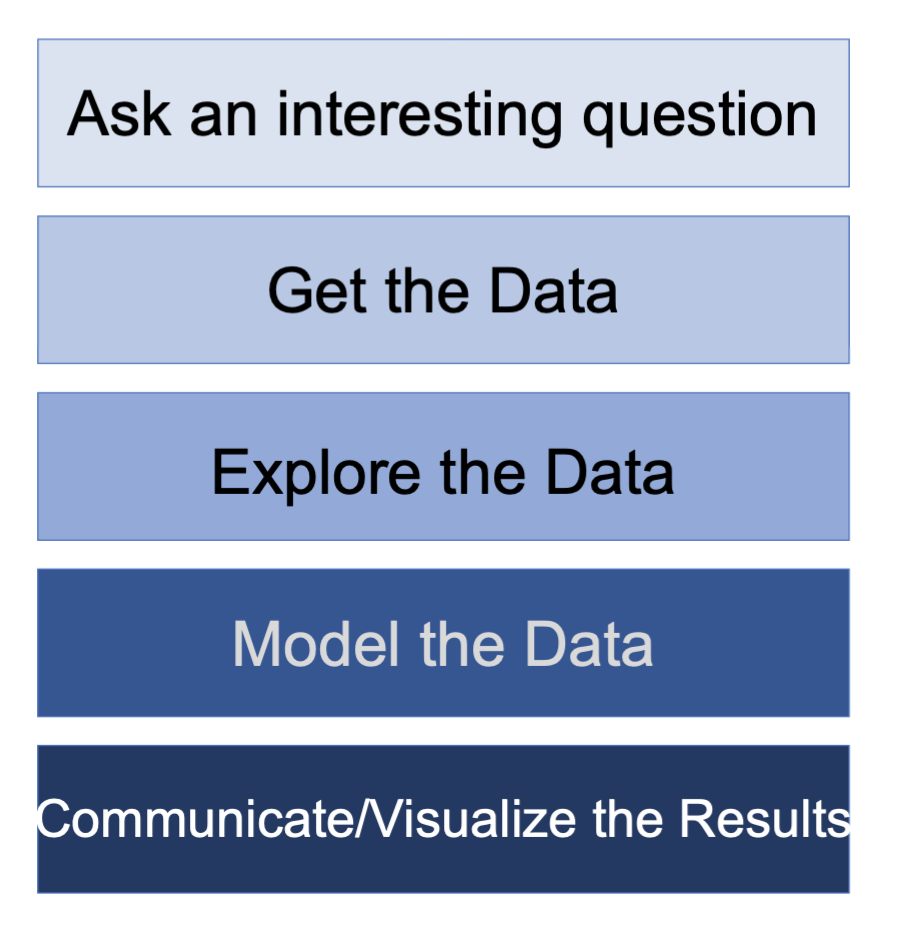

## 6. Try finding an interesting real-world problem that has been solved by the applications of data science.

### a.	Clearly understand the problem and write the problem statement in your own words.

I publish the following paper last year and answer the research question: 

how COVID-19 influence the commercial real estate price and rent in Florida?


Wen, Y., Fang, L., & Li, Q. (2022). Commercial Real Estate Market at a Crossroads: The Impact of COVID-19 and the Implications to Future Cities. Sustainability, 14(19), 12851.

### b.	Explore the dataset and attach a small sample with your submission

the overall code is available in github:https://github.com/yijiawen1203/CRE_COVID

### c.	Write a 200 – 500 word essay for the solution presented with ‘simple words (don’t explain the code) 

In order to understand the influence of COVID19 on commercial real estate market in Florida, I collect COVID data, office building rent price, sale price, and policy data (i.e., facial mask policy, stay at home policy) and merge the data together.

I use python to clean the data, visulize it, and run fixed-effect regression to see the influence.I find data science is especially helpful because it is a great tool to visualize the data, explore the data, and let me find the patterns behind the number.

I write the whole paper and the paper has been published. It is available online: https://www-mdpi-com.proxy.lib.fsu.edu/2071-1050/14/19/12851

Reference:


Wen, Y., Fang, L., & Li, Q. (2022). Commercial Real Estate Market at a Crossroads: The Impact of COVID-19 and the Implications to Future Cities. Sustainability, 14(19), 12851.

## 7. a. Make some distinctions between clean data and dirty data. How do you handle noisy data in data science ? 

the clean data has been taken from its original raw form, and been modifed.
the dirty data has errors that are not fixed, and has missing values, adn has useless information.
to handle noisy data, i need to clean the data and preprocess the data.
for example, i can visualize the data using histgram, and see if there is outliners. and i can normalize the data and impute the data. also, i need to replace missing data using some techniques, such as using medians.

## 7.b. Consider  a  table which  contains a person’s name, address and other information. Find out the noisy data from the table and correctly represent the table with clean data.  

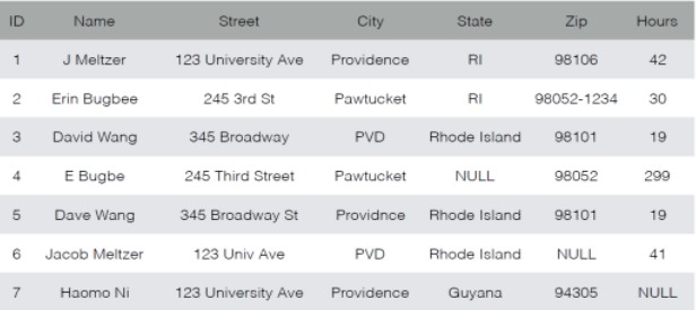

the noise data include: 

zip column "98052-1234"shoud be replaced by 98052

State column: RI should be replaced by "Rhode Island".
    
Street column: Streee should be replaced by St

In [92]:
#I create a row with the above noisy data


# Create an empty DataFrame
noisydata = pd.DataFrame(columns=['ID', 'Street','Zip','State'])

# Add a new row to the DataFrame
new_row = {'ID':'1','Street':'245 Third Street','Zip':'98052-1234','State':'RI'}
noisydata = noisydata.append(new_row, ignore_index=True)



In [93]:
noisydata

,ID,Street,Zip,State
0,1,245 Third Street,98052-1234,RI


In [95]:
import re

# new_text = re.sub("street", "st", text)

# Define a function to replace occurrences of "street" with "st"
def replace_street(text):
    return re.sub("street", "st", str(text))

# Use the applymap() method to apply the replace_street() function to every element of the DataFrame
noisydata = noisydata.applymap(replace_street)



In [96]:
noisydata

,ID,Street,Zip,State
0,1,245 Third Street,98052-1234,RI


In [99]:
def replace_state(text):
    return re.sub("RI", "Rhode Island", str(text))

In [101]:
noisydata= noisydata.applymap(replace_state)


In [102]:
noisydata

,ID,Street,Zip,State
0,1,245 Third Street,98052-1234,Rhode Island


In [106]:
for i in range(len(noisydata)):
    zipi=noisydata['Zip'][i][:5]
    noisydata['Zip'][i]=zipi
    
    
    

In [107]:
noisydata


,ID,Street,Zip,State
0,1,245 Third Street,98052,Rhode Island


## 8. clean twitter words

### 8.a.	You need to write an expression that will replace all the special characters(@?!,) from the sentence

In [27]:
words='@A new era of twitter is going to start?!! Twitter will lead the tech world from now on.Yeah..!!'

In [28]:
import re
new_words = re.sub(r"[@?!,]", "", words)
print(new_words)


A new era of twitter is going to start Twitter will lead the tech world from now on.Yeah..


### 8.b. These phone numbers need to be separated  into area code (first 3 digits), exchange (next 3 digits), and line number (last 4 digits)

In [38]:
phone=pd.DataFrame({'phone_number':['(541)471 3918','(603)281-0308',
                                    '(814)-462-8074','9704443106'
                                   ]})

In [41]:
phone

,phone_number
0,(541)471 3918
1,(603)281-0308
2,(814)-462-8074
3,9704443106


In [46]:
phone[['area_code','exchange','line_number']]=''

for ind in phone.index:
    number=phone.loc[ind,'phone_number']
    number_new=re.sub(r"[() -]", '', number)
    area_codei=number_new[:3]
    exchangei=number_new[3:6]
    line_numberi=number_new[6:]
    phone.loc[ind,'area_code']=area_codei
    phone.loc[ind,'exchange']=exchangei
    phone.loc[ind,'line_number']=line_numberi
    
    


In [47]:
phone

,phone_number,area_code,exchange,line_number
0,(541)471 3918,541,471,3918
1,(603)281-0308,603,281,0308
2,(814)-462-8074,814,462,8074
3,9704443106,970,444,3106


## 9Answer the following questions based on the dataset. (sales_subset.csv)

### a. Show the bottom 7 entries of the dataset

In [57]:
CircleK_Sales=pd.read_csv('/Users/yoga/Dropbox/0 FSU/5_2023_spring/3 CAP intro to data science/assignment/Introduction to Data Science assignment1/sales_subset .csv')

In [58]:
CircleK_Sales.tail(7)

,Unnamed: 0,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
10767,10767,39,A,99,2011-08-19,622.00,False,31.072222,0.938868,8.177
10768,10768,39,A,99,2011-11-11,50.00,False,17.283333,0.870976,7.716
10769,10769,39,A,99,2011-12-09,895.00,False,9.644444,0.834256,7.716
10770,10770,39,A,99,2012-02-03,350.00,False,15.938889,0.887619,7.244
10771,10771,39,A,99,2012-06-08,450.00,False,27.288889,0.911922,6.989
10772,10772,39,A,99,2012-07-13,0.06,False,25.644444,0.860145,6.623
10773,10773,39,A,99,2012-10-05,915.00,False,22.250000,0.955511,6.228


###  Show the information about the column types and missing values

no missing value in the dataframe

In [59]:
 CircleK_Sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10774 entries, 0 to 10773
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            10774 non-null  int64  
 1   store                 10774 non-null  int64  
 2   type                  10774 non-null  object 
 3   department            10774 non-null  int64  
 4   date                  10774 non-null  object 
 5   weekly_sales          10774 non-null  float64
 6   is_holiday            10774 non-null  bool   
 7   temperature_c         10774 non-null  float64
 8   fuel_price_usd_per_l  10774 non-null  float64
 9   unemployment          10774 non-null  float64
dtypes: bool(1), float64(4), int64(3), object(2)
memory usage: 768.2+ KB


In [60]:
sales_with_nan =  CircleK_Sales[ CircleK_Sales.isna().any(axis=1)]

In [61]:
sales_with_nan

,Unnamed: 0,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment


### Show some summary statistics that describe the CircleK_Sales Data Frame

In [62]:
CircleK_Sales.describe()

,Unnamed: 0,store,department,weekly_sales,temperature_c,fuel_price_usd_per_l,unemployment
count,10774.000000,10774.000000,10774.000000,10774.000000,10774.000000,10774.000000,10774.000000
mean,5386.500000,15.441897,45.218118,23843.950149,15.731978,0.749746,8.082009
std,3110.330234,11.534511,29.867779,30220.387557,9.922446,0.059494,0.624355
min,0.000000,1.000000,1.000000,-1098.000000,-8.366667,0.664129,3.879000
25%,2693.250000,4.000000,20.000000,3867.115000,7.583333,0.708246,7.795000
50%,5386.500000,13.000000,40.000000,12049.065000,16.966667,0.743381,8.099000
75%,8079.750000,20.000000,72.000000,32349.850000,24.166667,0.781421,8.360000
max,10773.000000,39.000000,99.000000,293966.050000,33.827778,1.107674,9.765000


<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


<Figure size 576x576 with 0 Axes>

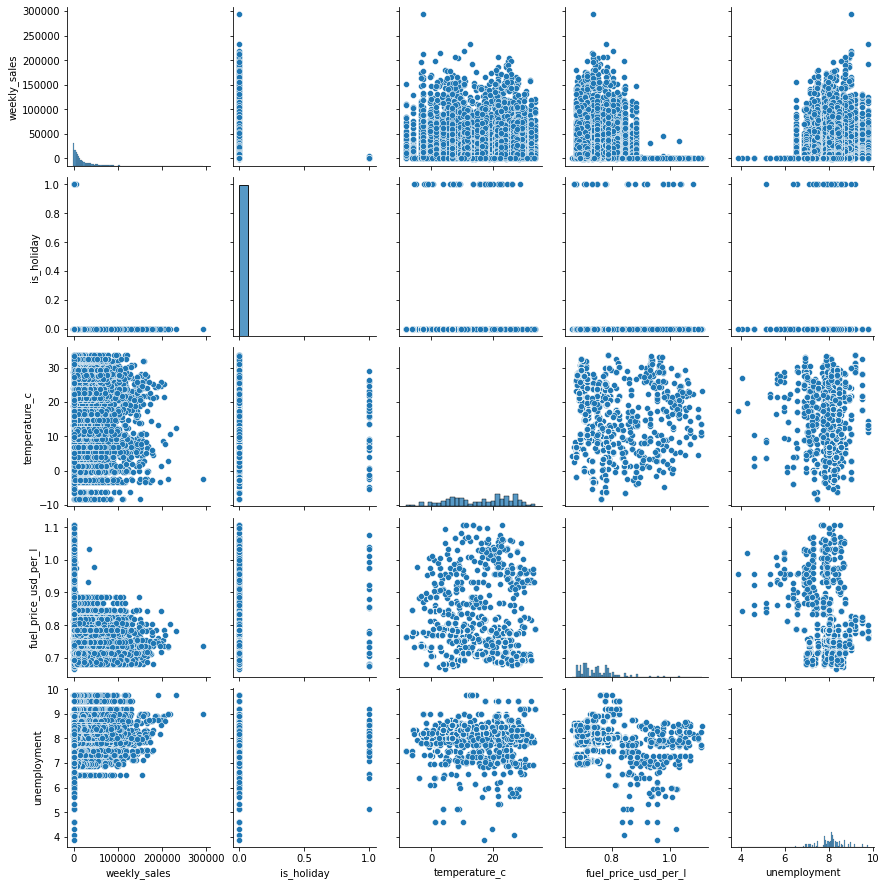

In [65]:
#Pair Plot
import matplotlib.pylab as plt
import seaborn as sns

plt.figure(figsize = (8,8))

subset_sales= CircleK_Sales.iloc[:,5:]  #drop first five columns, i dont want to plot them

# plot a pair plot
sns.pairplot(subset_sales)

# display the plot
plt.show()

### Show 2D NumPy array of the values in  CircleK_Sales


In [66]:
values = CircleK_Sales.to_numpy()
values

array([[0, 1, 'A', ..., 5.727777777777779, 0.6794508388787476, 8.106],
       [1, 1, 'A', ..., 8.055555555555555, 0.693451964252221, 8.106],
       [2, 1, 'A', ..., 16.81666666666667, 0.718284148876872, 7.808],
       ...,
       [10771, 39, 'A', ..., 27.28888888888889, 0.911922354513778, 6.989],
       [10772, 39, 'A', ..., 25.64444444444444, 0.8601446078496121,
        6.622999999999999],
       [10773, 39, 'A', ..., 22.25, 0.955510763695346, 6.228]],
      dtype=object)

### Sort  CircleK_Sales by the type of customers in descending order, and save this as  CircleK_type


In [70]:
CircleK_type=CircleK_Sales.sort_values(by='type', ascending=False)

In [71]:
CircleK_type

,Unnamed: 0,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
4379,4379,10,B,87,2010-06-04,19530.92,False,28.233333,0.776930,9.524
3976,3976,10,B,33,2011-01-07,10566.11,False,6.350000,0.868334,8.744
3974,3974,10,B,33,2010-11-05,12468.98,False,21.688889,0.794894,9.003
3973,3973,10,B,33,2010-10-01,8663.69,False,30.005556,0.792781,9.003
3972,3972,10,B,33,2010-09-03,9555.57,False,28.777778,0.815500,9.199
...,...,...,...,...,...,...,...,...,...,...
3291,3291,6,A,56,2010-06-04,7515.90,False,26.355556,0.714586,7.092
3292,3292,6,A,56,2010-07-02,4149.20,False,26.855556,0.705076,6.973
3293,3293,6,A,56,2010-08-06,1639.70,False,30.338889,0.693980,6.973
3294,3294,6,A,56,2010-09-03,2172.08,False,27.861111,0.680772,6.973


### f. Filter  CircleK_Sales for cases where fuel_price is greater than 0.70, assigning to  circle_fuel_price


In [72]:
circle_fuel_price=CircleK_Sales.loc[CircleK_Sales['fuel_price_usd_per_l']>0.7]

In [75]:
circle_fuel_price[:5]

,Unnamed: 0,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
2,2,1,A,1,2010-04-02,57258.43,False,16.816667,0.718284,7.808
3,3,1,A,1,2010-05-07,17413.94,False,22.527778,0.748928,7.808
4,4,1,A,1,2010-06-04,17558.09,False,27.050000,0.714586,7.808
5,5,1,A,1,2010-07-02,16333.14,False,27.172222,0.705076,7.787
9,9,1,A,1,2010-11-05,34238.88,False,14.855556,0.710359,7.838


### g. Filter  CircleK_Sales for cases where type is B and the day is Holiday, assigning to circle_type_hol


In [82]:
circle_type_hol=CircleK_Sales.loc[(CircleK_Sales['type']=="B")&(CircleK_Sales['is_holiday']==True)]

In [83]:
circle_type_hol

,Unnamed: 0,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
4092,4092,10,B,45,2010-09-10,31.41,True,28.911111,0.782214,9.199
4295,4295,10,B,77,2011-11-25,1590.00,True,15.933333,0.993287,7.874


### h. Add a column to  CircleK_Sales namely amount_of_sales(gallon), containing the weekly_sales and fuel_price

In [95]:
CircleK_Sales['amount_of_sales(gallon)']=''
CircleK_Sales['amount_of_sales(gallon)']=CircleK_Sales['weekly_sales']*CircleK_Sales['fuel_price_usd_per_l']



In [96]:
CircleK_Sales[:3]

,Unnamed: 0,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment,amount_of_sales(gallon)
0,0,1,A,1,2010-02-05,24924.50,False,5.727778,0.679451,8.106,16934.972434
1,1,1,A,1,2010-03-05,21827.90,False,8.055556,0.693452,8.106,15136.600131
2,2,1,A,1,2010-04-02,57258.43,False,16.816667,0.718284,7.808,41127.822659


###  Subset rows where amount_of_sales(gallon)is higher than 36000.0, assigning to high_sales

In [97]:
high_sales=CircleK_Sales[CircleK_Sales['amount_of_sales(gallon)']>36000]

In [99]:
high_sales[:3]

,Unnamed: 0,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment,amount_of_sales(gallon)
2,2,1,A,1,2010-04-02,57258.43,False,16.816667,0.718284,7.808,41127.822659
171,171,1,A,16,2010-05-07,52933.20,False,22.527778,0.748928,7.808,39643.162035
201,201,1,A,18,2010-12-03,53845.12,False,9.594444,0.715378,7.838,38519.627982


## 10 Please find the data set attached in the format of CSV (allcovidtables.csv) from the unknown data source for the purposes of creating better training sets, use the pandas’ library to load this dataset and write a regular expression to do the following tasks

### •	Numerical ranges ex: 0-1, 0.2 -0.5 replace with word RANGE 

In [110]:
allcovidtables=pd.read_csv('/Users/yoga/Dropbox/0 FSU/5_2023_spring/3 CAP intro to data science/assignment/Introduction to Data Science assignment1/allcovidtables.csv')

In [244]:
allcovidtables[:3]

,Unnamed: 0,_id,meta_h,meta_v,data,label
0,1,62d6d4eb65561b91762be735,"['Variable', 'Frequency (%)', 'Age Groups:']","['""0-1 year""']",['13 (32.5)'],1
1,2,62d6d4eb65561b91762be735,"['Variable', 'Frequency (%)', 'Age Groups:']","['""1.1-5 year""']",['9 (22.5)'],1
2,3,62d6d4eb65561b91762be735,"['Variable', 'Frequency (%)', 'Age Groups:']","['""5.1-15 year""']",['5 (12.5)'],1


In [246]:
# new_text = re.sub(r'\d+\.\d+-\d+', "Range", text)
# new_text1 = re.sub(r'\d+\.\d+-\d+\.\d+', "Range", '1.5-3.45')
# match = re.search(r'\d+\.\d+-\d+\.\d+', text)

In [247]:
# for i in range(len(allcovidtables)):
#     meta_v_i=allcovidtables['meta_v'][i]
#     meta_v_i_new=re.sub(r'\d+(\.\d+)?-\d+(\.\d+)?', "RANGE", meta_v_i)
#     allcovidtables['meta_v'][i]=meta_v_i_new
    

def numerical_ranges(number):
    if isinstance(number, str):
        return re.sub(r'\d+(\.\d+)?\s*-\s*\d+(\.\d+)?', "RANGE", number)
    return number

allcovidtables2 = allcovidtables.applymap(numerical_ranges)
    

In [248]:
allcovidtables2

,Unnamed: 0,_id,meta_h,meta_v,data,label
0,1,62d6d4eb65561b91762be735,"['Variable', 'Frequency (%)', 'Age Groups:']","['""RANGE year""']",['13 (32.5)'],1
1,2,62d6d4eb65561b91762be735,"['Variable', 'Frequency (%)', 'Age Groups:']","['""RANGE year""']",['9 (22.5)'],1
2,3,62d6d4eb65561b91762be735,"['Variable', 'Frequency (%)', 'Age Groups:']","['""RANGE year""']",['5 (12.5)'],1
3,4,62d6d4eb65561b91762be735,"['Variable', 'Frequency (%)', 'Age Groups:']","['""RANGE year""']",['1 (2.5)'],1
4,5,62d6d4eb65561b91762be735,"['Variable', 'Frequency (%)', 'Age Groups:']","['""RANGE year""']",['5 (12.5)'],1
...,...,...,...,...,...,...
1373237,1373238,62d6d9f165561b917632066e,"['Monitoring, No', 'Positive, No.', 'Influenza...","['""""']","['After', '126199', '(121.7%)*', '28644 (106.4...",1
1373238,1373239,62d6d9f165561b917632066e,"['Monitoring, No', 'Positive, No.', 'Influenza...","['""""']","['Sum', '224633', '', '55573', '40068', '15505...",1
1373239,1373240,62d6d9f165561b917632066e,"['Monitoring, No', 'Positive, No.', 'Influenza...","['""RANGE""']","['Before', '107968', '', '35570', '16884', '18...",1
1373240,1373241,62d6d9f165561b917632066e,"['Monitoring, No', 'Positive, No.', 'Influenza...","['""""']","['After', '52696', '(48.8%)*', '9997 (28.1%)*'...",1


### •	Negative numbers ex: -1, -0.5 replace with the word NEG

In [249]:
allcovidtables=pd.read_csv('/Users/yoga/Dropbox/0 FSU/5_2023_spring/3 CAP intro to data science/assignment/Introduction to Data Science assignment1/allcovidtables.csv')

In [254]:
def negative(number):
    if isinstance(number, (int,float)):
        if number<0:
            return "NEG"
        return number
        
allcovidtables3 = allcovidtables.applymap(negative)






In [256]:
allcovidtables[:5]

,Unnamed: 0,_id,meta_h,meta_v,data,label
0,1,62d6d4eb65561b91762be735,"['Variable', 'Frequency (%)', 'Age Groups:']","['""0-1 year""']",['13 (32.5)'],1
1,2,62d6d4eb65561b91762be735,"['Variable', 'Frequency (%)', 'Age Groups:']","['""1.1-5 year""']",['9 (22.5)'],1
2,3,62d6d4eb65561b91762be735,"['Variable', 'Frequency (%)', 'Age Groups:']","['""5.1-15 year""']",['5 (12.5)'],1
3,4,62d6d4eb65561b91762be735,"['Variable', 'Frequency (%)', 'Age Groups:']","['""15.1-30 year""']",['1 (2.5)'],1
4,5,62d6d4eb65561b91762be735,"['Variable', 'Frequency (%)', 'Age Groups:']","['""30.1 -50 year""']",['5 (12.5)'],1


### •	Floating numbers ex: 0.02,0.009 replaced with the word FLOAT

In [259]:
# def replace_floats(number):
#     if isinstance(number, (int, float)):
#         if isinstance(number, float):
#             return "FLOAT"
#     return number

def replace_floats(number):
    if isinstance(number, str):
        return re.sub(r'\d+\.\d+', "FLOAT", number)
    return number



allcovidtables4 = allcovidtables.applymap(replace_floats)

In [261]:
allcovidtables4[:5]

,Unnamed: 0,_id,meta_h,meta_v,data,label
0,1,62d6d4eb65561b91762be735,"['Variable', 'Frequency (%)', 'Age Groups:']","['""0-1 year""']",['13 (FLOAT)'],1
1,2,62d6d4eb65561b91762be735,"['Variable', 'Frequency (%)', 'Age Groups:']","['""FLOAT-5 year""']",['9 (FLOAT)'],1
2,3,62d6d4eb65561b91762be735,"['Variable', 'Frequency (%)', 'Age Groups:']","['""FLOAT-15 year""']",['5 (FLOAT)'],1
3,4,62d6d4eb65561b91762be735,"['Variable', 'Frequency (%)', 'Age Groups:']","['""FLOAT-30 year""']",['1 (FLOAT)'],1
4,5,62d6d4eb65561b91762be735,"['Variable', 'Frequency (%)', 'Age Groups:']","['""FLOAT -50 year""']",['5 (FLOAT)'],1


### •	Numbers ex: 1, 9,250 replace with the word INT

In [272]:
def replace_int(number):
    if isinstance(number, str):
        return re.sub(r'(?!\.)\b\d+\b(?!\.)', "INT", number)
    return number



allcovidtables5 = allcovidtables.applymap(replace_int)

In [273]:
allcovidtables5[:5]

,Unnamed: 0,_id,meta_h,meta_v,data,label
0,1,62d6d4eb65561b91762be735,"['Variable', 'Frequency (%)', 'Age Groups:']","['""INT-INT year""']",['INT (32.INT)'],1
1,2,62d6d4eb65561b91762be735,"['Variable', 'Frequency (%)', 'Age Groups:']","['""1.INT-INT year""']",['INT (22.INT)'],1
2,3,62d6d4eb65561b91762be735,"['Variable', 'Frequency (%)', 'Age Groups:']","['""5.INT-INT year""']",['INT (12.INT)'],1
3,4,62d6d4eb65561b91762be735,"['Variable', 'Frequency (%)', 'Age Groups:']","['""15.INT-INT year""']",['INT (2.INT)'],1
4,5,62d6d4eb65561b91762be735,"['Variable', 'Frequency (%)', 'Age Groups:']","['""30.INT -INT year""']",['INT (12.INT)'],1


### •	Percentages ex: 10%,0.35% replace with the word PERCENT


In [275]:
def replace_Percentages(number):
    if isinstance(number, str):
        return re.sub(r'\b\d+(\.\d+)?%', "PERCENT", number)
    return number

    
allcovidtables6 = allcovidtables.applymap(replace_Percentages)   
    

In [276]:
allcovidtables6[:5]

,Unnamed: 0,_id,meta_h,meta_v,data,label
0,1,62d6d4eb65561b91762be735,"['Variable', 'Frequency (%)', 'Age Groups:']","['""0-1 year""']",['13 (32.5)'],1
1,2,62d6d4eb65561b91762be735,"['Variable', 'Frequency (%)', 'Age Groups:']","['""1.1-5 year""']",['9 (22.5)'],1
2,3,62d6d4eb65561b91762be735,"['Variable', 'Frequency (%)', 'Age Groups:']","['""5.1-15 year""']",['5 (12.5)'],1
3,4,62d6d4eb65561b91762be735,"['Variable', 'Frequency (%)', 'Age Groups:']","['""15.1-30 year""']",['1 (2.5)'],1
4,5,62d6d4eb65561b91762be735,"['Variable', 'Frequency (%)', 'Age Groups:']","['""30.1 -50 year""']",['5 (12.5)'],1


### •	Dates ex: 10-aug-1996, 10/4/2023 replace with the word DATE

In [111]:
allcovidtables[:4]

,Unnamed: 0,_id,meta_h,meta_v,data,label
0,1,62d6d4eb65561b91762be735,"['Variable', 'Frequency (%)', 'Age Groups:']","['""0-1 year""']",['13 (32.5)'],1
1,2,62d6d4eb65561b91762be735,"['Variable', 'Frequency (%)', 'Age Groups:']","['""1.1-5 year""']",['9 (22.5)'],1
2,3,62d6d4eb65561b91762be735,"['Variable', 'Frequency (%)', 'Age Groups:']","['""5.1-15 year""']",['5 (12.5)'],1
3,4,62d6d4eb65561b91762be735,"['Variable', 'Frequency (%)', 'Age Groups:']","['""15.1-30 year""']",['1 (2.5)'],1


In [112]:
def replace_dates(text):
    return re.sub(r"\d{1,2}[-/]\w{3}[-/]\d{4}", "DATE", str(text))

# Use the applymap() method to apply the replace_dates() function to every element of the DataFrame
allcovidtables7 = allcovidtables.applymap(replace_dates)


In [114]:
allcovidtables7[:5]

,Unnamed: 0,_id,meta_h,meta_v,data,label
0,1,62d6d4eb65561b91762be735,"['Variable', 'Frequency (%)', 'Age Groups:']","['""0-1 year""']",['13 (32.5)'],1
1,2,62d6d4eb65561b91762be735,"['Variable', 'Frequency (%)', 'Age Groups:']","['""1.1-5 year""']",['9 (22.5)'],1
2,3,62d6d4eb65561b91762be735,"['Variable', 'Frequency (%)', 'Age Groups:']","['""5.1-15 year""']",['5 (12.5)'],1
3,4,62d6d4eb65561b91762be735,"['Variable', 'Frequency (%)', 'Age Groups:']","['""15.1-30 year""']",['1 (2.5)'],1
4,5,62d6d4eb65561b91762be735,"['Variable', 'Frequency (%)', 'Age Groups:']","['""30.1 -50 year""']",['5 (12.5)'],1


### •	Units ex: 10mg,7ml,18kg with the word UNITMG, UNITML , UNITKG

In [115]:
def replace_mg(text):
    return re.sub(r"\d+mg", "UNITMG", str(text))

# Use the applymap() method to apply the replace_doses() function to every element of the DataFrame


In [121]:
allcovidtables8 = allcovidtables.applymap(replace_mg)


In [122]:
def replace_ml(text):
    return re.sub(r"\d+ml", "UNITML", str(text))

In [123]:
def replace_kg(text):
    return re.sub(r"\d+kg", "UNITKG", str(text))

In [124]:
allcovidtables8 = allcovidtables8.applymap(replace_ml)

allcovidtables8= allcovidtables8.applymap(replace_kg)


In [125]:
allcovidtables8[:4]

,Unnamed: 0,_id,meta_h,meta_v,data,label
0,1,62d6d4eb65561b91762be735,"['Variable', 'Frequency (%)', 'Age Groups:']","['""0-1 year""']",['13 (32.5)'],1
1,2,62d6d4eb65561b91762be735,"['Variable', 'Frequency (%)', 'Age Groups:']","['""1.1-5 year""']",['9 (22.5)'],1
2,3,62d6d4eb65561b91762be735,"['Variable', 'Frequency (%)', 'Age Groups:']","['""5.1-15 year""']",['5 (12.5)'],1
3,4,62d6d4eb65561b91762be735,"['Variable', 'Frequency (%)', 'Age Groups:']","['""15.1-30 year""']",['1 (2.5)'],1
